In [1]:
import pandas as pd
import random
import sys
sys.path.append('../..')

from model import init_utils
from model import processing
# Experiments
from model import run
from model.plot_utils import *
from model.amm.omnipool_amm import OmnipoolState
from model.amm.agents import agent_dict, TradeStrategies

# same seed, same parameters = same simulation result
random.seed(42)

initial_state = OmnipoolState(
    tokens={
        'HDX': {'liquidity': 1000000, 'LRNA_price': 1},
        'USD': {'liquidity': 1000000, 'LRNA_price': 1},
        'R1': {'liquidity': 500000, 'LRNA_price': 2},
        'R2': {'liquidity': 1500000, 'LRNA_price': 2/3},
    },
    lrna_fee=0,
    asset_fee=0
)

agent_d = {
    'Trader': agent_dict(
        r_values={'HDX': 10000, 'USD': 1000000, 'R1': 1000000, 'R2': 3000000},
        trade_strategy=TradeStrategies.random_swaps(amount={'R1': 100, 'R2': 300, 'HDX': 200, 'USD': 200})
    )
}

state = {'state': {'amm': initial_state, 'agents': agent_d, 'external': {}}}
config_dict = init_utils.get_configuration(timesteps = 1000)

pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:.2f}'.format

run.config(config_dict, state)
events = run.run()

rdf, agent_df = processing.postprocessing(events, optional_params=['pool_val', 'deposit_val', 'withdraw_val'])



                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (1000, 1, 1, 1)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 0.80s


[0]


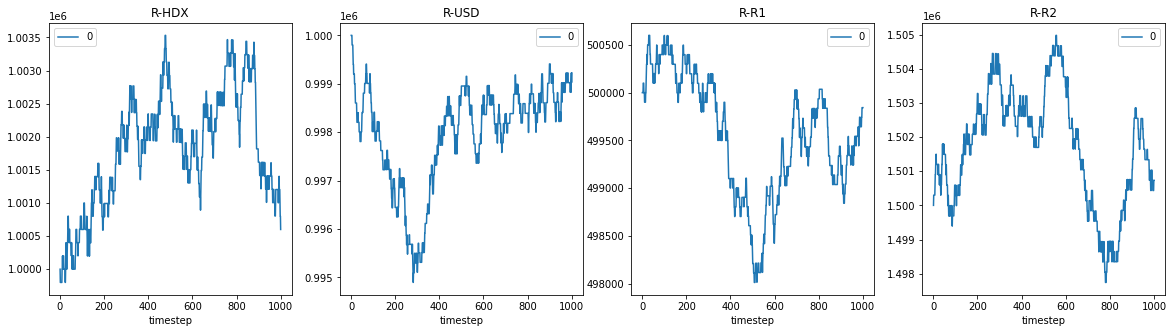

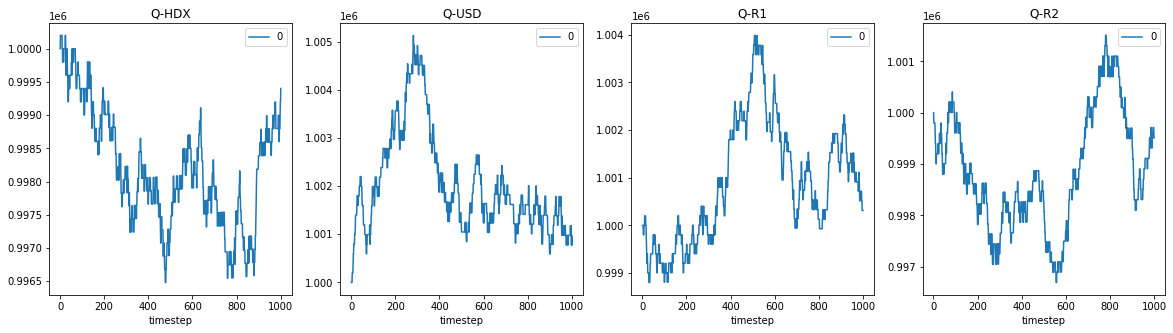

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

In [2]:

var_list = ['R', 'Q', 'A', 'D']
plot_vars(rdf, var_list)

[0]


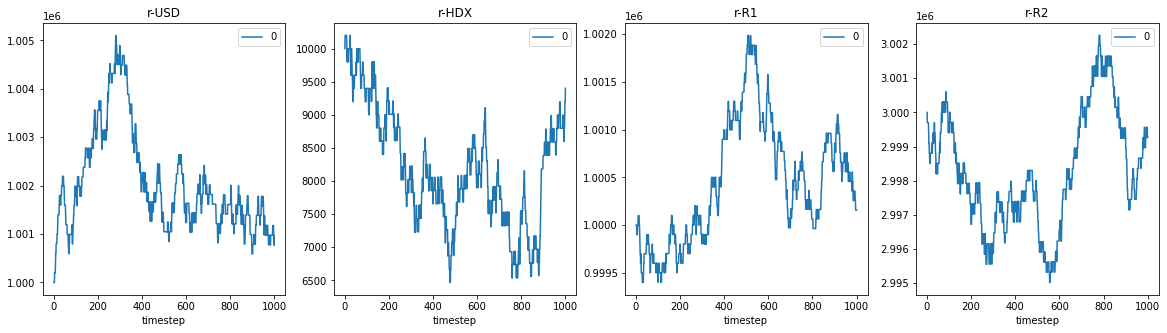

In [3]:
var_list = ['r']
plot_vars(agent_df, var_list)